# **Roboflow Dataset-Link** - 'https://universe.roboflow.com/yolox-qcftu/indian-number-plate-keeo5'

# **INSTALL DEPENDENCIES**

In [1]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 144.6 MB/s eta 0:00:00


# **Import Modules**

In [2]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from ultralytics import YOLO
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **Load The Dataset**

In [3]:
# DOWNLOAD DATASET FROM ROBOFLOW (METHOD 1)

from roboflow import Roboflow
rf = Roboflow(api_key="5tiVmFnSNXE8lmBhSdK1")
project = rf.workspace("yolox-qcftu").project("indian-number-plate-keeo5")
version = project.version(2)
dataset = version.download("yolov8")

print("✅ Dataset downloaded successfully!")
print("Dataset location:", dataset.location)


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Indian-number-plate-2 in yolov8:: 100%|██████████| 2716/2716 [00:00<00:00, 2749.48it/s]

✅ Dataset downloaded successfully!
Dataset location: /content/Indian-number-plate-2


In [4]:
# CHECK DATASET STRUCTURE

!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


# **Data Preprocessing**

In [5]:
# FIX data.yaml (IMPORTANT STEP)
# Roboflow gives ../train/images which fails in Colab

# FIXED_YAML_PATH = "/content/data.yaml"

#FIXED_YAML_PATH = "/content/Indian-number-plate-2/data_fixed.yaml"

#FIXED_YAML_PATH = f"{dataset.location}/data_fixed.yaml"

# yaml_text = f"""
# train: {dataset.location}/train/images
# val: {dataset.location}/valid/images
# test: {dataset.location}/test/images

# nc: 1
# names: ['number_plate']
# """

# with open(FIXED_YAML_PATH, "w") as f:
#     f.write(yaml_text)

# print("✅ Fixed YAML created at:", FIXED_YAML_PATH)


In [6]:
import yaml

FIXED_YAML_PATH = f"{dataset.location}/data_fixed.yaml"

data = {
    "train": f"{dataset.location}/train/images",
    "val": f"{dataset.location}/valid/images",
    "test": f"{dataset.location}/test/images",
    "nc": 1,
    "names": ["number_plate"]
}

with open(FIXED_YAML_PATH, "w") as f:
    yaml.dump(data, f)

print("✅ Fixed YAML created at:", FIXED_YAML_PATH)

✅ Fixed YAML created at: /content/Indian-number-plate-2/data_fixed.yaml


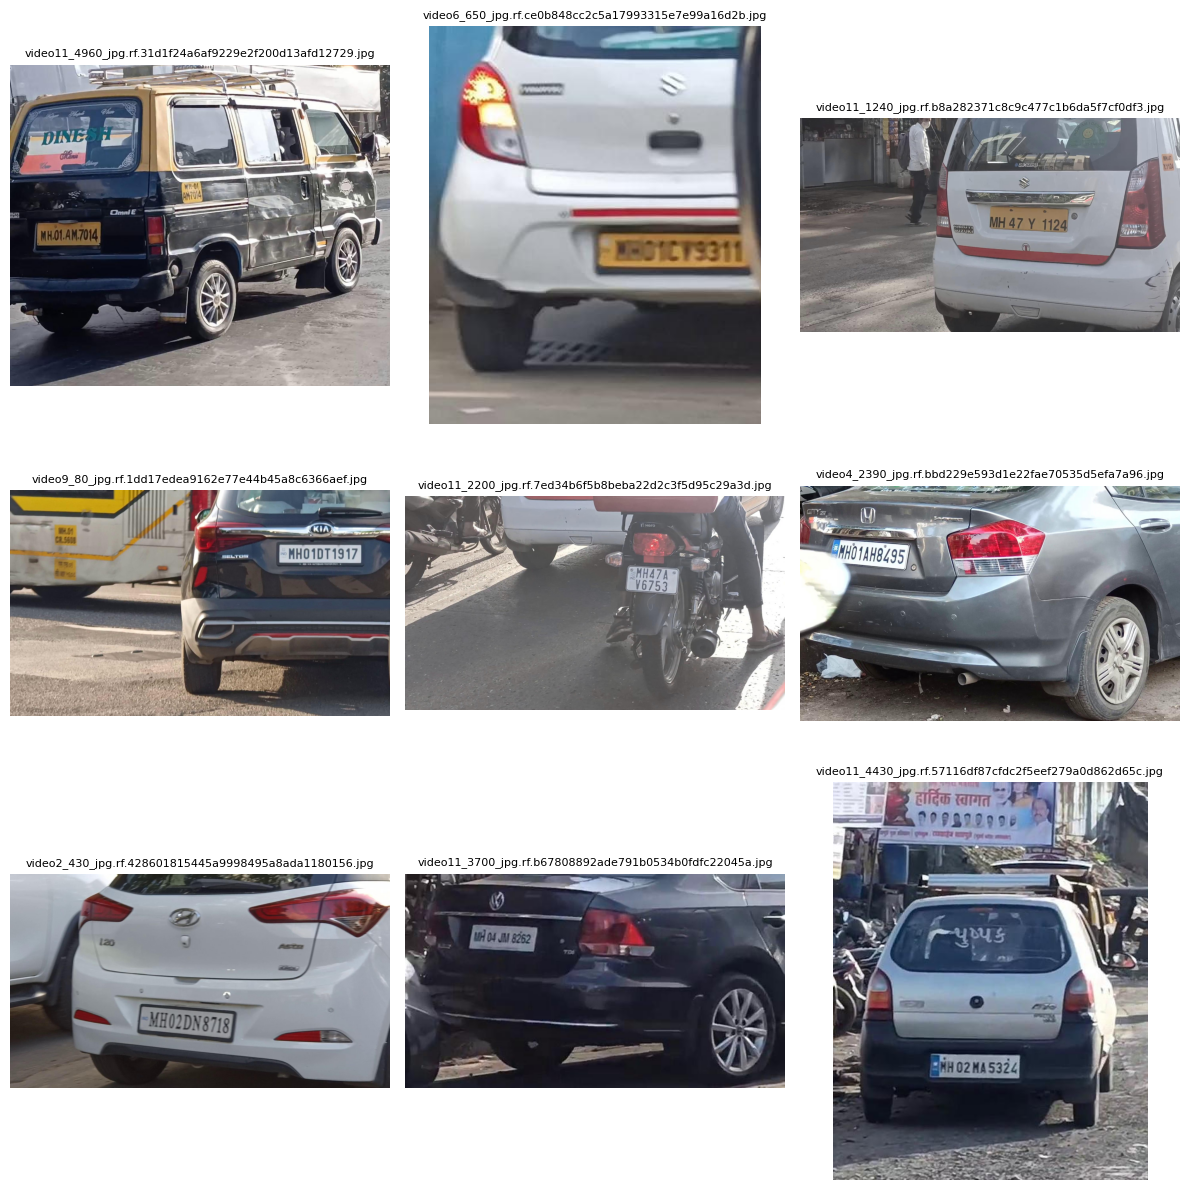

In [7]:
# VISUALIZE RANDOM TRAIN IMAGES (BEFORE TRAINING)

TRAIN_IMG_DIR = f"{dataset.location}/train/images"

train_images = os.listdir(TRAIN_IMG_DIR)
sample_imgs = random.sample(train_images, 9)

plt.figure(figsize=(12, 12))

for i, img_name in enumerate(sample_imgs):
    img_path = os.path.join(TRAIN_IMG_DIR, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(img_name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()

# **Model Building**

In [8]:
# Load The Yolo Model

model = YOLO("yolov8n.pt")

In [9]:
# TRAIN YOLO MODEL

model.train(
    data=FIXED_YAML_PATH,
    epochs=10,
    imgsz=640,
    batch=16,
    name="train",
    exist_ok=True
)

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Indian-number-plate-2/data_fixed.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8c154a5700>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
# Check the Results

results_csv = "/content/runs/detect/train/results.csv"
df = pd.read_csv(results_csv)

In [11]:
df.head()

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   29.8070         1.18520         2.40489         1.07307   
1      2   53.2775         1.13916         1.49059         1.04282   
2      3   78.0549         1.12488         1.13408         1.04541   
3      4  102.0710         1.09736         0.90455         1.04195   
4      5  125.7960         1.06787         0.75128         1.03009   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               1.00000            0.58023           0.94277   
1               1.00000            0.95956           0.98464   
2               0.95200            0.74359           0.89845   
3               0.96242            0.98501           0.98230   
4               0.99822            1.00000           0.99500   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.58989       1.16358       2.59295       0.98668  0.000658   
1              0.68497       1.13665       0.99237       1.05597  0.001193   
2              0.54037       1.41300       1.79229       1.15501  0.001597   
3              0.67007       1.12573       0.70392       1.02055  0.001406   
4              0.69745       1.07211       0.57414       1.00132  0.001208   

     lr/pg1    lr/pg2  
0  0.000658  0.000658  
1  0.001193  0.001193  
2  0.001597  0.001597  
3  0.001406  0.001406  
4  0.001208  0.001208

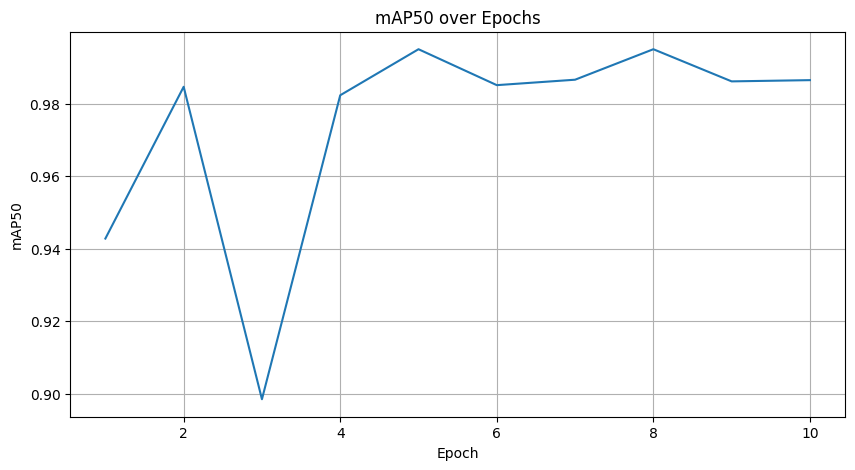

In [12]:
# PLOT TRAINING GRAPH (mAP50 over Epochs)

plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/mAP50(B)"])
plt.title("mAP50 over Epochs")
plt.xlabel("Epoch")
plt.ylabel("mAP50")
plt.grid(True)
plt.show()

# **Model Evaluation**

In [13]:
# LOAD BEST MODEL

BEST_MODEL_PATH = "/content/runs/detect/train/weights/best.pt"
best_model = YOLO(BEST_MODEL_PATH)

In [14]:
# EVALUATE ON TEST DATASET (BEFORE PREDICTION)

best_model.val(
    data=FIXED_YAML_PATH,
    split="test"
)

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1344.9±742.5 MB/s, size: 101.5 KB)
val: Scanning /content/Indian-number-plate-2/test/labels... 59 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 59/59 1.4Kit/s 0.0s
val: New cache created: /content/Indian-number-plate-2/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.8it/s 2.3s
                   all         59         59      0.999          1      0.995      0.764
Speed: 8.6ms preprocess, 14.3ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8c148bd8e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [15]:
# split = test means test folder?

# Yes ✅

# split="test" means YOLO will use the test folder defined in your data.yaml.

# Example data.yaml:

# train: train/images
# val: valid/images
# test: test/images


# So:

# Default (no split given)
# model.val(data="data.yaml")


# ➡️ uses val/images

# With split="test"
# model.val(data="data.yaml", split="test")


# ➡️ uses test/images

# So yes, split="test" = evaluate on test folder.

In [16]:
import os
import random
import cv2
import matplotlib.pyplot as plt


# ==========================================================
# FUNCTION: DRAW YOLO BOXES WITH RANDOM COLOR PER IMAGE
# ==========================================================
def draw_boxes_custom(image_path, results, font_scale=1.2, thickness=3):

    # Load image
    img = cv2.imread(image_path)

    # Random color for this image
    color = (
        random.randint(0, 255),
        random.randint(0, 255),
        random.randint(0, 255)
    )

    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls = int(box.cls[0])   # ✅ class id (important if multiple classes)

        #label = f"Class {cls} | {conf:.2f}"
        # If you want class name:
        # label = f"{results.names[cls]} {conf:.2f}"
        class_name = results.names[cls]
        label = f"{class_name} {conf:.2f}"

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

        # Draw label text
        cv2.putText(
            img,
            label,
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            color,
            thickness
        )

    return img


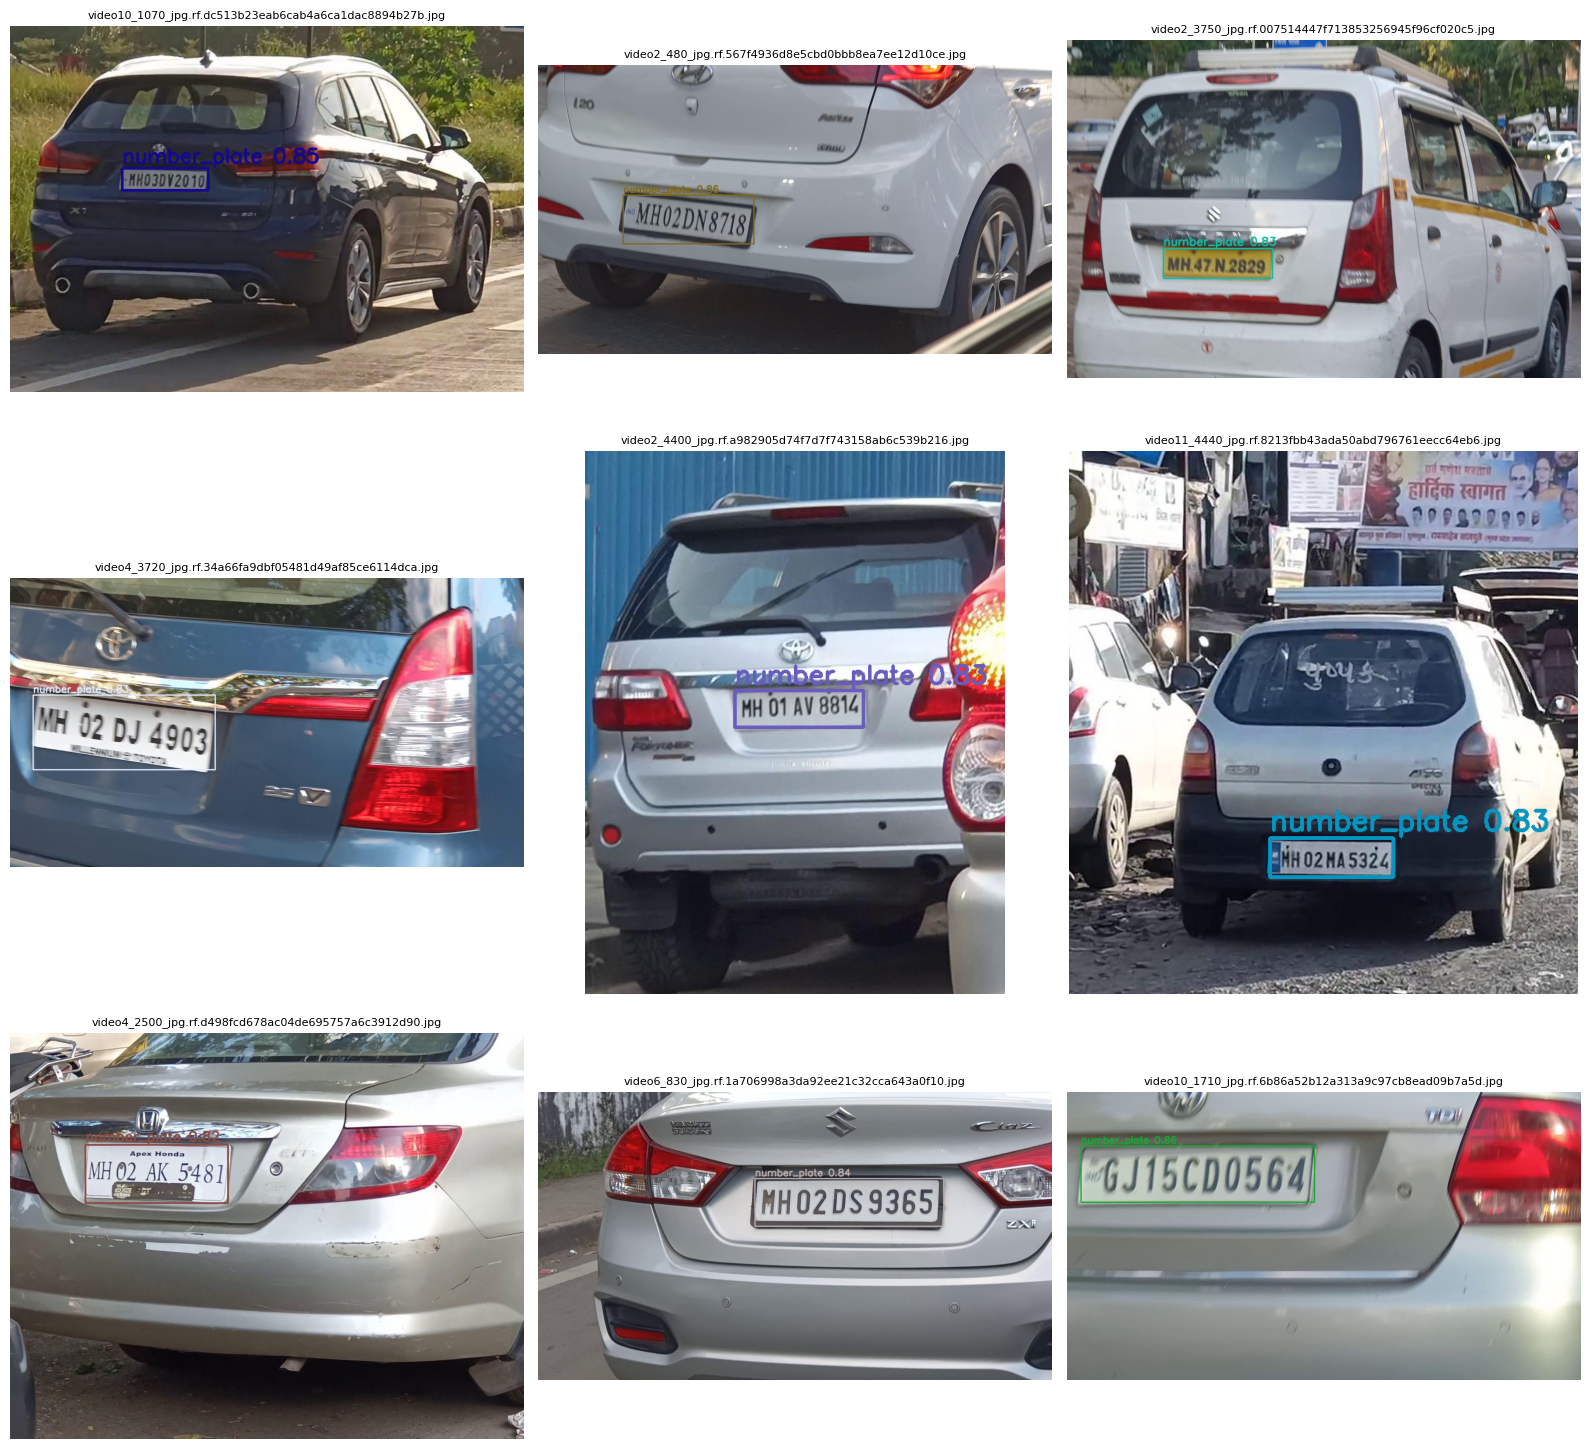

In [26]:
# ==========================================================
# VISUALIZE RANDOM TEST PREDICTIONS (AFTER TRAINING) -> If you want to adjust bbox thickness & color of bbox use the above function then proceed below code
# ==========================================================
TEST_IMG_DIR = f"{dataset.location}/test/images"

test_images = os.listdir(TEST_IMG_DIR)
sample_test_imgs = random.sample(test_images, 9)

plt.figure(figsize=(16, 16))

for i, img_name in enumerate(sample_test_imgs):
    img_path = os.path.join(TEST_IMG_DIR, img_name)

    # Predict
    result = best_model.predict(img_path, conf=0.4, imgsz=640, verbose=False)[0]

    # Draw boxes using function
    annotated_img = draw_boxes_custom(img_path, result, font_scale=1.2, thickness=3)

    # Convert BGR -> RGB for matplotlib
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # Plot
    plt.subplot(3, 3, i+1)
    plt.imshow(annotated_img)
    plt.title(img_name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [18]:
# VISUALIZE RANDOM TEST PREDICTIONS (AFTER TRAINING) - > Plot using yolo's result function

# TEST_IMG_DIR = f"{dataset.location}/test/images"

# test_images = os.listdir(TEST_IMG_DIR)
# sample_test_imgs = random.sample(test_images, 9)

# plt.figure(figsize=(12, 12))

# for i, img_name in enumerate(sample_test_imgs):
#     img_path = os.path.join(TEST_IMG_DIR, img_name)

#     results = best_model.predict(img_path, conf=0.4, imgsz=640, verbose=False)[0]

#     annotated_img = results.plot()
#     #annotated_img = results.plot(conf=True, labels=False)  # remove "number_plate" text

#     annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

#     plt.subplot(3, 3, i+1)
#     plt.imshow(annotated_img)
#     plt.title(img_name, fontsize=8)
#     plt.axis("off")

# plt.tight_layout()
# plt.show()

In [19]:
# DOWNLOAD BEST MODEL (best.pt)

from google.colab import files
files.download(BEST_MODEL_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Assignment

https://universe.roboflow.com/platerecognition-7gchs/experiment-plates/dataset/1

In [ ]:
# color_sample = [
#     (0,0,255)
#     # (12, 128, 255),   # Orange-ish
#     # (255, 0, 127),    # Pink
#     # (0, 255, 0),      # Green
#     # (255, 255, 0),    # Cyan
#     # (0, 165, 255)     # Blue-ish
# ]